<a href="https://colab.research.google.com/github/eternaldemon/AI-Median-TIET/blob/master/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

data = tf.keras.datasets.cifar10

(x_train,y_train), (x_test, y_test) = data.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0].shape #Shape of 1 image 
# Single image is of 32x32x3 where 3 are the no of colour formats here due to it being RGB

(32, 32, 3)

In [4]:
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()


In [18]:
from tensorflow.keras.layers import Input,Conv2D,Flatten,Dense,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model 

K=10
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()




Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        1849

In [12]:

regularization_loss=tf.add_n(model.losses)
print(regularization_loss)

Tensor("AddN:0", shape=(), dtype=float32)


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#temp = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =250,batch_size=100)

In [20]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
temp = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 26s 17ms/step - loss: 1.4107 - accuracy: 0.5106 - val_loss: 1.2833 - val_accuracy: 0.5676
Epoch 2/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.9801 - accuracy: 0.6613 - val_loss: 1.0124 - val_accuracy: 0.6578
Epoch 3/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.8404 - accuracy: 0.7123 - val_loss: 0.8989 - val_accuracy: 0.7124
Epoch 4/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.7495 - accuracy: 0.7438 - val_loss: 0.8833 - val_accuracy: 0.7048
Epoch 5/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6812 - accuracy: 0.7683 - val_loss: 0.6441 - val_accuracy: 0.7812
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.6279 - accuracy: 0.7859 - val_loss: 0.5990 - val_accuracy: 0.8006
Epoch 7/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.5976 - accuracy: 0.7969 - val_loss: 0.5886 -

In [ ]:
'''
import tempfile
tmpdir = tempfile.mkdtemp()
model2= tf.saved_model.save(model, tmpdir)
'''

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/tmp5dy4veex/assets


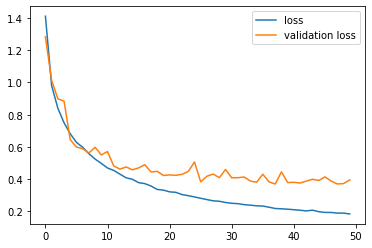

In [21]:
plt.figure()
plt.plot(temp.history['loss'], label='loss')
plt.plot(temp.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


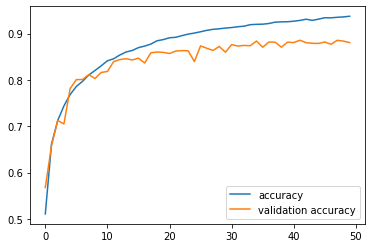

In [22]:
plt.figure()
plt.plot(temp.history['accuracy'], label='accuracy')
plt.plot(temp.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8805


[0.395266056060791, 0.8805000185966492]

Confusion matrix, without normalization
[[895  17  38   6   4   0   3   8  10  19]
 [  6 964   0   1   0   0   1   0   1  27]
 [ 17   0 873  20  30  18  19  14   3   6]
 [ 12   5  49 736  28  89  30  21   5  25]
 [  5   2  36  26 849  25  19  37   1   0]
 [  5   2  30  79  18 814   9  33   0  10]
 [  6   4  28  15   8   3 925   5   1   5]
 [  7   0   9   5  14  16   1 945   1   2]
 [ 63  31   3   4   2   1   1   4 863  28]
 [  6  42   2   3   0   1   1   1   3 941]]


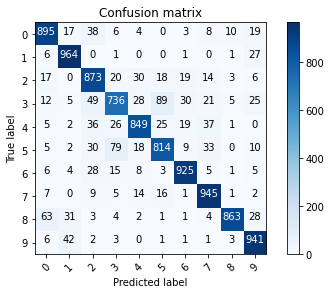

In [23]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [25]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

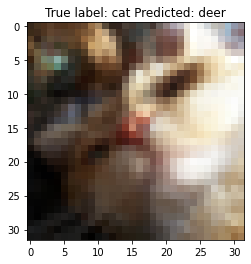

In [28]:
# Showing some misclassified examples
# Run this code snippet again and again to get a new misclassified prediction
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));